<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-13 09:57:02--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  56.8MB/s    in 3.8s    

2025-09-13 09:57:08 (53.2 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


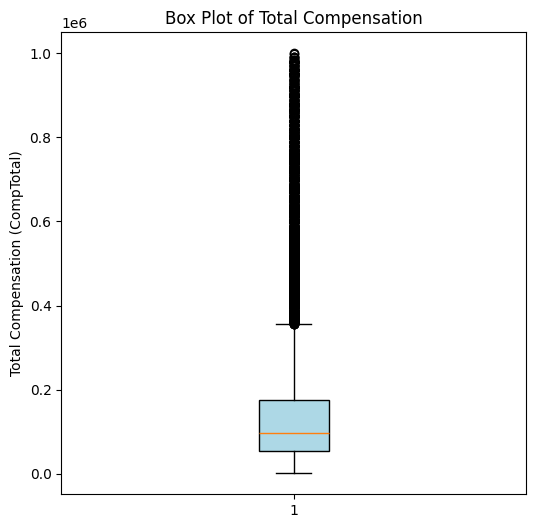

In [10]:
# your code goes here

query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Clean numeric values ---
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal"])

# --- Remove extreme outliers for readability ---
df = df[(df["CompTotal"] > 1000) & (df["CompTotal"] < 1_000_000)]

# --- Plot boxplot ---
plt.figure(figsize=(6,6))
plt.boxplot(df["CompTotal"], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))

plt.ylabel("Total Compensation (CompTotal)")
plt.title("Box Plot of Total Compensation")
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


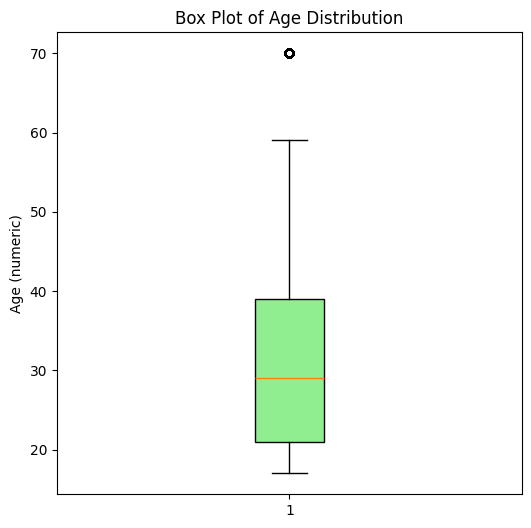

In [11]:
# your code goes here
# --- Fetch age data ---
query = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
"""
df_age = pd.read_sql(query, conn)

# --- Map age ranges to numeric midpoints ---
def age_to_numeric(age):
    if "Under 18" in age: return 17
    if "18-24" in age: return 21
    if "25-34" in age: return 29
    if "35-44" in age: return 39
    if "45-54" in age: return 49
    if "55-64" in age: return 59
    if "65" in age: return 70
    return None

df_age["AgeNumeric"] = df_age["Age"].apply(age_to_numeric)
df_age = df_age.dropna(subset=["AgeNumeric"])

# --- Plot boxplot ---
plt.figure(figsize=(6,6))
plt.boxplot(df_age["AgeNumeric"], vert=True, patch_artist=True, boxprops=dict(facecolor="lightgreen"))

plt.ylabel("Age (numeric)")
plt.title("Box Plot of Age Distribution")
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.

<Figure size 1000x600 with 0 Axes>

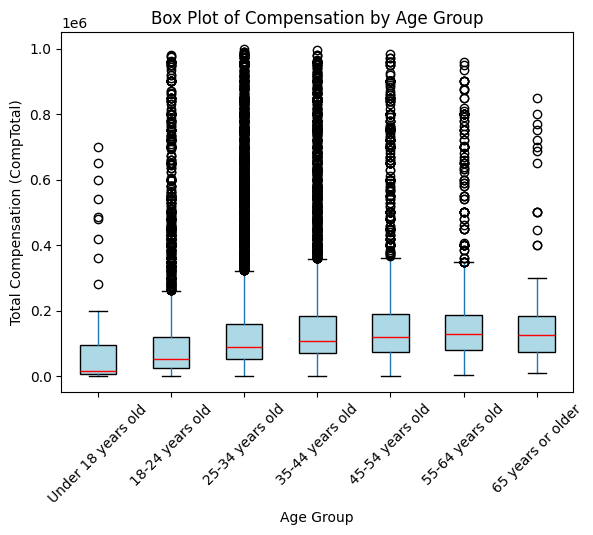

In [13]:

# --- Fetch data ---
query = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Convert compensation to numeric and clean ---
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal"])

# Remove extreme outliers
df = df[(df["CompTotal"] > 1000) & (df["CompTotal"] < 1_000_000)]

# --- Sort age groups in natural order ---
age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old", 
    "35-44 years old", "45-54 years old", "55-64 years old", 
    "65 years or older"
]
df = df[df["Age"].isin(age_order)]
df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)

# --- Plot boxplot ---
plt.figure(figsize=(10,6))
df.boxplot(column="CompTotal", by="Age", grid=False, patch_artist=True,
           boxprops=dict(facecolor="lightblue", color="black"),
           medianprops=dict(color="red"))

plt.ylabel("Total Compensation (CompTotal)")
plt.xlabel("Age Group")
plt.title("Box Plot of Compensation by Age Group")
plt.suptitle("")  # remove automatic 'CompTotal by Age' title
plt.xticks(rotation=45)
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [15]:
# See what columns exist
query = "PRAGMA table_info(main);"
cols = pd.read_sql(query, conn)
print(cols[["name"]])

# Peek at JobSat column data
query = "SELECT JobSatPoints_6, COUNT(*) as cnt FROM main GROUP BY JobSatPoints_6"
print(pd.read_sql(query, conn))


                    name
0             ResponseId
1             MainBranch
2                    Age
3             Employment
4             RemoteWork
..                   ...
109      JobSatPoints_11
110         SurveyLength
111           SurveyEase
112  ConvertedCompYearly
113               JobSat

[114 rows x 1 columns]
    JobSatPoints_6    cnt
0              NaN  35987
1              0.0   7912
2              1.0     43
3              2.0     43
4              3.0     40
..             ...    ...
89            96.0      1
90            97.0      2
91            98.0      5
92            99.0     23
93           100.0   1020

[94 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

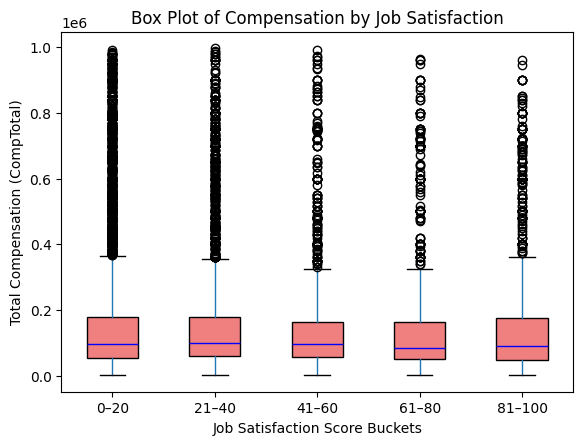

In [16]:
# --- Fetch data ---
query = """
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Convert to numeric ---
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")
df = df.dropna(subset=["CompTotal", "JobSatPoints_6"])

# --- Remove extreme outliers in compensation ---
df = df[(df["CompTotal"] > 1000) & (df["CompTotal"] < 1_000_000)]

# --- Bin satisfaction scores into categories (optional for readability) ---
bins = [0, 20, 40, 60, 80, 100]
labels = ["0–20", "21–40", "41–60", "61–80", "81–100"]
df["JobSatBucket"] = pd.cut(df["JobSatPoints_6"], bins=bins, labels=labels, include_lowest=True)

# --- Plot boxplot ---
plt.figure(figsize=(10,6))
df.boxplot(column="CompTotal", by="JobSatBucket", grid=False, patch_artist=True,
           boxprops=dict(facecolor="lightcoral", color="black"),
           medianprops=dict(color="blue"))

plt.ylabel("Total Compensation (CompTotal)")
plt.xlabel("Job Satisfaction Score Buckets")
plt.title("Box Plot of Compensation by Job Satisfaction")
plt.suptitle("")  # remove default title
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1000x600 with 0 Axes>

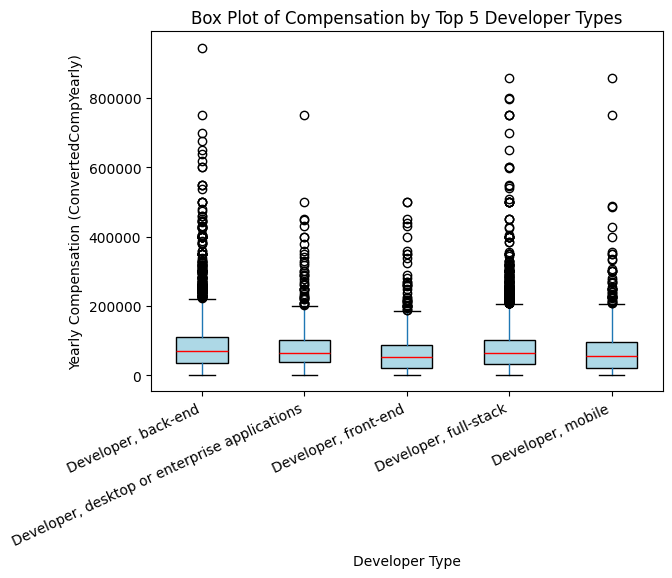

In [17]:
# your code goes here
# --- Fetch data ---
query = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Convert compensation to numeric and clean ---
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")
df = df.dropna(subset=["ConvertedCompYearly"])
df = df[(df["ConvertedCompYearly"] > 1000) & (df["ConvertedCompYearly"] < 1_000_000)]

# --- Split multiple roles into separate rows ---
df_roles = df.assign(DevType=df["DevType"].str.split(";")).explode("DevType")
df_roles["DevType"] = df_roles["DevType"].str.strip()

# --- Find top 5 most common developer roles ---
top5_roles = df_roles["DevType"].value_counts().head(5).index
df_top5 = df_roles[df_roles["DevType"].isin(top5_roles)]

# --- Plot boxplot ---
plt.figure(figsize=(10,6))
df_top5.boxplot(column="ConvertedCompYearly", by="DevType", grid=False, patch_artist=True,
                boxprops=dict(facecolor="lightblue", color="black"),
                medianprops=dict(color="red"))

plt.ylabel("Yearly Compensation (ConvertedCompYearly)")
plt.xlabel("Developer Type")
plt.title("Box Plot of Compensation by Top 5 Developer Types")
plt.suptitle("")  # remove default title
plt.xticks(rotation=25, ha="right")
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1000x600 with 0 Axes>

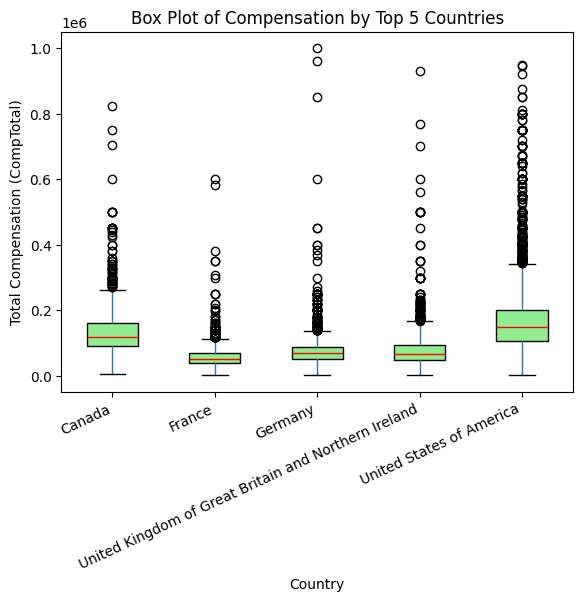

In [18]:
# your code goes here
# --- Fetch data ---
query = """
SELECT Country, CompTotal
FROM main
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Convert CompTotal to numeric and clean ---
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal"])
df = df[(df["CompTotal"] > 1000) & (df["CompTotal"] < 1_000_000)]

# --- Find top 5 countries by count ---
top5_countries = df["Country"].value_counts().head(5).index
df_top5 = df[df["Country"].isin(top5_countries)]

# --- Plot boxplot ---
plt.figure(figsize=(10,6))
df_top5.boxplot(column="CompTotal", by="Country", grid=False, patch_artist=True,
                boxprops=dict(facecolor="lightgreen", color="black"),
                medianprops=dict(color="red"))

plt.ylabel("Total Compensation (CompTotal)")
plt.xlabel("Country")
plt.title("Box Plot of Compensation by Top 5 Countries")
plt.suptitle("")  # remove default title
plt.xticks(rotation=25, ha="right")
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 1000x600 with 0 Axes>

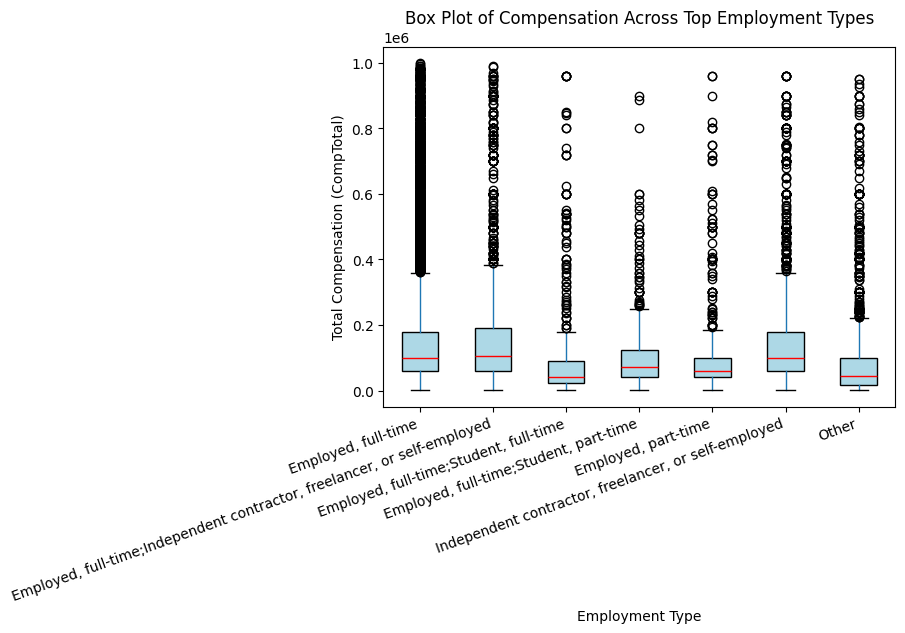

In [21]:
# your code goes here
# --- Fetch data ---
query = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Convert CompTotal to numeric and clean ---
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal"])
df = df[(df["CompTotal"] > 1000) & (df["CompTotal"] < 1_000_000)]
# --- Count top 6 employment types ---
top_employment = df["Employment"].value_counts().head(6).index

# --- Group smaller categories as "Other" ---
df["Employment_clean"] = df["Employment"].apply(
    lambda x: x if x in top_employment else "Other"
)

# --- Plot cleaned boxplot ---
plt.figure(figsize=(10,6))
df.boxplot(column="CompTotal", by="Employment_clean", grid=False, patch_artist=True,
           boxprops=dict(facecolor="lightblue", color="black"),
           medianprops=dict(color="red"))

plt.ylabel("Total Compensation (CompTotal)")
plt.xlabel("Employment Type")
plt.title("Box Plot of Compensation Across Top Employment Types")
plt.suptitle("")
plt.xticks(rotation=20, ha="right")
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

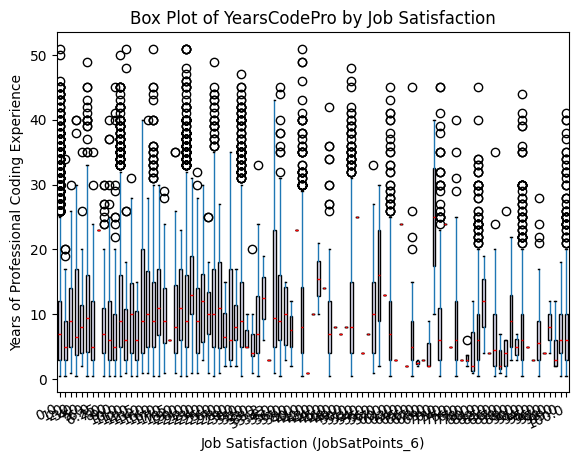

In [20]:
# your code goes here
# --- Fetch data ---
query = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Convert YearsCodePro to numeric ---
def convert_years(val):
    if val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 51
    else:
        try:
            return float(val)
        except:
            return None

df["YearsCodePro"] = df["YearsCodePro"].apply(convert_years)
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")

# --- Drop nulls ---
df = df.dropna(subset=["YearsCodePro", "JobSatPoints_6"])

# --- Keep only reasonable ranges ---
df = df[(df["YearsCodePro"] >= 0) & (df["YearsCodePro"] <= 51)]

# --- Plot boxplot ---
plt.figure(figsize=(12,6))
df.boxplot(column="YearsCodePro", by="JobSatPoints_6", grid=False, patch_artist=True,
           boxprops=dict(facecolor="lavender", color="black"),
           medianprops=dict(color="red"))

plt.ylabel("Years of Professional Coding Experience")
plt.xlabel("Job Satisfaction (JobSatPoints_6)")
plt.title("Box Plot of YearsCodePro by Job Satisfaction")
plt.suptitle("")  # remove pandas auto title
plt.xticks(rotation=25, ha="right")
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
